In [1]:
import os
import pandas as pd
from pathlib import Path
import numpy
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import shutil

In [2]:
PLT_DATA_PATH = "./Sepsis_plt/plt/PLT_TRUE/reduction_rate/"
PLT_LIST_PATH = "./Sepsis_plt/Sepsis plt/"

In [ ]:
plt_HN = []     # Plt HN list
path = Path(PLT_LIST_PATH)

for file in sorted(path.glob("plt_ASEhn_p*.txt")):
    with file.open("r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split(",")
            if len(parts) >= 2:
                plt_HN.append(parts[1].strip())

plt_HN = pd.DataFrame(plt_HN, columns=["ID"])
plt_HN.head()

,ID
0,HN010018904
1,HN01002502K
2,HN01004573Q
3,HN01005173U
4,HN010079261


In [ ]:
def combine_year_parts(plt_data_path):
    """Combine all P* parts for each year into single files"""
    output_folder = "./Sepsis_plt/plt_year/"
    os.makedirs(output_folder, exist_ok=True)
    
    for year in range(2001, 2024):
        print(f"Combining files for year {year}...")
        
        # Look for all parts for this year with the correct pattern
        pattern = os.path.join(plt_data_path, f"*_Sepsis_PresumedInfection_Bili_Plt_{year}_P*_plt_TRUE_rate.csv")
        files = glob.glob(pattern)
        
        if not files:
            print(f"  No files found for year {year}")
            print(f"  Pattern used: {pattern}")
            continue
        
        print(f"  Found {len(files)} parts for year {year}")
        
        # Read and combine all parts
        all_parts = []
        for file_path in files:
            try:
                df = pd.read_csv(file_path)
                all_parts.append(df)
                print(f"    Read {os.path.basename(file_path)}: {len(df)} rows")
            except Exception as e:
                print(f"    Error reading {file_path}: {e}")
                continue
        
        if all_parts:
            # Combine all parts
            combined_df = pd.concat(all_parts, ignore_index=True)
            
            # Save combined file
            output_file = os.path.join(output_folder, f"plt_{year}.csv")
            combined_df.to_csv(output_file, index=False)
            
            print(f"  ✓ Combined {len(all_parts)} parts into plt_{year}.csv: {len(combined_df)} total rows")
        else:
            print(f"  ✗ No data could be read for year {year}")

def main(PLT_DATA_PATH):
    """Main function to combine files"""
    if not os.path.exists(PLT_DATA_PATH):
        print(f"Path '{PLT_DATA_PATH}' does not exist!")
        PLT_DATA_PATH = input("Please enter the path to PLT_DATA_PATH: ").strip()
        
    if not os.path.exists(PLT_DATA_PATH):
        print(f"Error: Path '{PLT_DATA_PATH}' does not exist!")
        return
    
    print(f"Using data path: {PLT_DATA_PATH}")
    combine_year_parts(PLT_DATA_PATH)
    print("\nCombining complete! All files saved to ./Sepsis_plt/plt_year/")

if __name__ == "__main__":
    main(PLT_DATA_PATH)

Using data path: ./Sepsis_plt/plt/PLT_TRUE/reduction_rate/
Combining files for year 2001...
  Found 4 parts for year 2001
    Read 7596519_Sepsis_PresumedInfection_Bili_Plt_2001_P1_plt_TRUE_rate.csv: 17871 rows
    Read 7596523_Sepsis_PresumedInfection_Bili_Plt_2001_P2_plt_TRUE_rate.csv: 13495 rows
    Read 7596526_Sepsis_PresumedInfection_Bili_Plt_2001_P3_plt_TRUE_rate.csv: 13804 rows
    Read 7596527_Sepsis_PresumedInfection_Bili_Plt_2001_P4_plt_TRUE_rate.csv: 12590 rows
  ✓ Combined 4 parts into plt_2001.csv: 57760 total rows
Combining files for year 2002...
  Found 6 parts for year 2002
    Read 7596532_Sepsis_PresumedInfection_Bili_Plt_2002_P1_plt_TRUE_rate.csv: 11663 rows
    Read 7596537_Sepsis_PresumedInfection_Bili_Plt_2002_P2_plt_TRUE_rate.csv: 12156 rows
    Read 7596539_Sepsis_PresumedInfection_Bili_Plt_2002_P3_plt_TRUE_rate.csv: 12619 rows
    Read 7596543_Sepsis_PresumedInfection_Bili_Plt_2002_P4_plt_TRUE_rate.csv: 15042 rows
    Read 7596546_Sepsis_PresumedInfection_Bili

In [ ]:
def create_master_combined_file():
    """Combine all plt_YYYY.csv files into one master file"""
    input_folder = "./Sepsis_plt/plt_year/"
    output_folder = "./Sepsis_plt/plt_year/"
    
    # Find all plt_YYYY.csv files
    pattern = os.path.join(input_folder, "plt_*.csv")
    year_files = glob.glob(pattern)
    
    if not year_files:
        print("No plt_YYYY.csv files found!")
        return
    
    print(f"Found {len(year_files)} year files:")
    
    # List to store all year DataFrames
    all_years_data = []
    
    for file_path in year_files:
        try:
            # Extract year from filename
            filename = os.path.basename(file_path)
            year = filename.replace('plt_', '').replace('.csv', '')
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Add year column if not already present
            if 'Year' not in df.columns:
                df['Year'] = year
            
            all_years_data.append(df)
            print(f"  ✓ Added {filename}: {len(df)} rows")
            
        except Exception as e:
            print(f"  ✗ Error reading {file_path}: {e}")
            continue
    
    if all_years_data:
        # Combine all years into one master DataFrame
        master_df = pd.concat(all_years_data, ignore_index=True)
        
        # Save master combined file
        master_file = os.path.join(output_folder, "plt_ALL_YEARS.csv")
        master_df.to_csv(master_file, index=False)
        
        print(f"\n✓ Master combined file created: plt_ALL_YEARS.csv")
        print(f"  Total rows: {len(master_df):,}")
        print(f"  Years included: {len(all_years_data)}")
        print(f"  File saved to: {master_file}")
        
        # Show summary by year
        if 'Year' in master_df.columns:
            year_counts = master_df['Year'].value_counts().sort_index()
            print(f"\nYear-wise breakdown:")
            for year, count in year_counts.items():
                print(f"  {year}: {count:,} rows")
    else:
        print("No data could be combined!")

def main():
    """Main function to create master combined file"""
    print("Creating master combined file from plt_YYYY.csv files...")
    create_master_combined_file()

if __name__ == "__main__":
    main()

Creating master combined file from plt_YYYY.csv files...
Found 23 year files:
  ✓ Added plt_2001.csv: 57760 rows
  ✓ Added plt_2002.csv: 72362 rows


C:\Users\Vincent Yeung\AppData\Local\Temp\ipykernel_35948\4107200472.py:30: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  ✓ Added plt_2003.csv: 245805 rows
  ✓ Added plt_2004.csv: 271750 rows
  ✓ Added plt_2005.csv: 270784 rows
  ✓ Added plt_2006.csv: 267539 rows
  ✓ Added plt_2007.csv: 261666 rows
  ✓ Added plt_2008.csv: 282052 rows
  ✓ Added plt_2009.csv: 278444 rows
  ✓ Added plt_2010.csv: 211619 rows
  ✓ Added plt_2011.csv: 237671 rows
  ✓ Added plt_2012.csv: 295727 rows
  ✓ Added plt_2013.csv: 326143 rows
  ✓ Added plt_2014.csv: 486139 rows
  ✓ Added plt_2015.csv: 516111 rows
  ✓ Added plt_2016.csv: 483293 rows
  ✓ Added plt_2017.csv: 401320 rows
  ✓ Added plt_2018.csv: 468303 rows
  ✓ Added plt_2019.csv: 766396 rows
  ✓ Added plt_2020.csv: 716276 rows
  ✓ Added plt_2021.csv: 809825 rows
  ✓ Added plt_2022.csv: 734105 rows
  ✓ Added plt_2023.csv: 750304 rows

✓ Master combined file created: plt_ALL_YEARS.csv
  Total rows: 9,211,394
  Years included: 23
  File saved to: ./Sepsis_plt/plt_year/plt_ALL_YEARS.csv

Year-wise breakdown:
  2001: 57,760 rows
  2002: 72,362 rows
  2003: 245,805 rows
  2004: 

In [11]:
def combine_patient_lists_keep_duplicates():
    """Combine all plt_ASEhn_p*.txt files into one master file (keeping duplicates)"""
    plt_list_path = "./Sepsis_plt/Sepsis plt/"
    
    # Find all plt_ASEhn_p*.txt files
    pattern = os.path.join(plt_list_path, "plt_ASEhn_p*.txt")
    patient_files = glob.glob(pattern)
    
    if not patient_files:
        print(f"No plt_ASEhn_p*.txt files found in {plt_list_path}")
        return
    
    # Sort files numerically by part number
    patient_files.sort(key=lambda x: int(x.split('p')[-1].split('.')[0]))
    
    print(f"Found {len(patient_files)} patient list files:")
    
    all_lines = []
    
    # Read all files and combine content
    for file_path in patient_files:
        try:
            filename = os.path.basename(file_path)
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()
                all_lines.extend(lines)
            
            print(f"  ✓ Read {filename}: {len(lines)} lines")
            
        except Exception as e:
            print(f"  ✗ Error reading {file_path}: {e}")
            continue
    
    # Save combined file (with duplicates)
    output_file = os.path.join(plt_list_path, "plt_ASEhn_ALL.txt")
    with open(output_file, 'w', encoding='utf-8') as f:
        for line in all_lines:
            f.write(line)
    
    print(f"\n✓ Combined file created: plt_ASEhn_ALL.txt")
    print(f"  Total lines: {len(all_lines)}")
    print(f"  File saved to: {output_file}")

def main():
    """Main function to combine patient lists"""
    print("Combining patient list files (keeping duplicates)...")
    combine_patient_lists_keep_duplicates()

if __name__ == "__main__":
    main()

Combining patient list files (keeping duplicates)...
Found 14 patient list files:
  ✓ Read plt_ASEhn_p1.txt: 5000 lines
  ✓ Read plt_ASEhn_p2.txt: 5000 lines
  ✓ Read plt_ASEhn_p3.txt: 5000 lines
  ✓ Read plt_ASEhn_p4.txt: 5000 lines
  ✓ Read plt_ASEhn_p5.txt: 5000 lines
  ✓ Read plt_ASEhn_p6.txt: 5000 lines
  ✓ Read plt_ASEhn_p7.txt: 5000 lines
  ✓ Read plt_ASEhn_p8.txt: 5000 lines
  ✓ Read plt_ASEhn_p9.txt: 5000 lines
  ✓ Read plt_ASEhn_p10.txt: 5000 lines
  ✓ Read plt_ASEhn_p11.txt: 5000 lines
  ✓ Read plt_ASEhn_p12.txt: 5000 lines
  ✓ Read plt_ASEhn_p13.txt: 5000 lines
  ✓ Read plt_ASEhn_p14.txt: 3722 lines

✓ Combined file created: plt_ASEhn_ALL.txt
  Total lines: 68722
  File saved to: ./Sepsis_plt/Sepsis plt/plt_ASEhn_ALL.txt


Analyzing unique patient counts per year using Reference Key...
Found 23 year files
  2001: 7985 unique patients (57760 total records)
  2002: 11357 unique patients (72362 total records)


C:\Users\Vincent Yeung\AppData\Local\Temp\ipykernel_35428\979263467.py:31: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  2003: 34983 unique patients (245805 total records)
  2004: 37073 unique patients (271750 total records)
  2005: 39687 unique patients (270784 total records)
  2006: 37669 unique patients (267539 total records)
  2007: 37655 unique patients (261666 total records)
  2008: 41498 unique patients (282052 total records)
  2009: 40072 unique patients (278444 total records)
  2010: 31710 unique patients (211619 total records)
  2011: 34799 unique patients (237671 total records)
  2012: 43432 unique patients (295727 total records)
  2013: 44750 unique patients (326143 total records)
  2014: 62664 unique patients (486139 total records)
  2015: 66068 unique patients (516111 total records)
  2016: 58931 unique patients (483293 total records)
  2017: 46468 unique patients (401320 total records)
  2018: 56713 unique patients (468303 total records)
  2019: 94554 unique patients (766396 total records)
  2020: 85497 unique patients (716276 total records)
  2021: 92661 unique patients (809825 total re

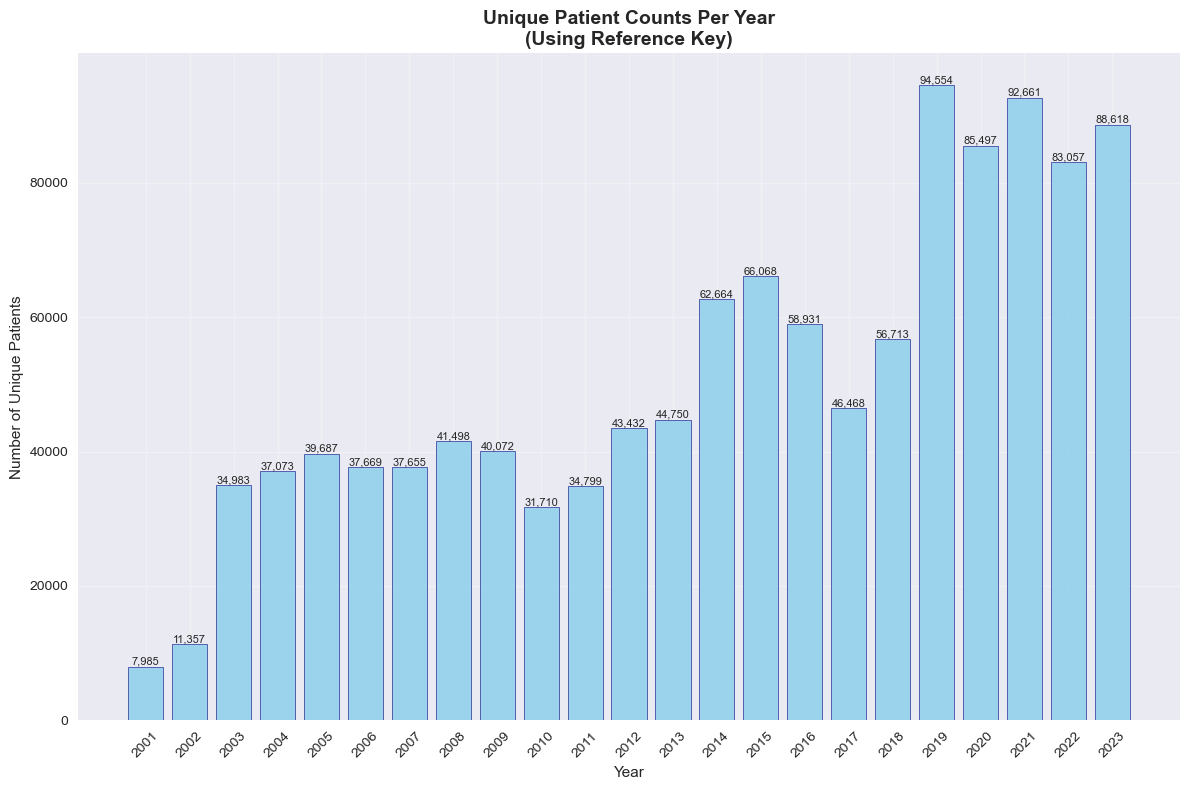


✓ Statistics saved to: ./Sepsis_plt/plt_year/patient_counts_statistics.csv

SUMMARY STATISTICS
Total unique patients (2001-2023): 1,177,901
Total records (2001-2023): 9,211,394
Overall average records per patient: 7.82

Year with most patients: 2019 (94,554.0 patients)
Year with highest records/patient: 2022 (8.84 records/patient)


In [5]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def count_unique_patients_per_year():
    """Count unique patients per year using Reference Key only"""
    input_folder = "./Sepsis_plt/plt_year/"
    
    # Find all plt_YYYY.csv files
    pattern = os.path.join(input_folder, "plt_*.csv")
    year_files = glob.glob(pattern)
    
    # Filter out the master combined file if it exists
    year_files = [f for f in year_files if 'ALL_YEARS' not in f]
    
    if not year_files:
        print("No plt_YYYY.csv files found!")
        return
    
    print(f"Found {len(year_files)} year files")
    
    year_stats = []
    
    for file_path in year_files:
        try:
            # Extract year from filename
            filename = os.path.basename(file_path)
            year = filename.replace('plt_', '').replace('.csv', '')
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Count unique patients using Reference Key only
            if 'Reference Key' in df.columns:
                unique_ref_keys = df['Reference Key'].nunique()
                total_rows = len(df)
                
                year_stats.append({
                    'Year': int(year),
                    'Unique_Patients': unique_ref_keys,
                    'Total_Records': total_rows,
                    'Records_per_Patient': total_rows / unique_ref_keys if unique_ref_keys > 0 else 0
                })
                
                print(f"  {year}: {unique_ref_keys} unique patients ({total_rows} total records)")
            else:
                print(f"  ✗ 'Reference Key' column not found in {filename}")
            
        except Exception as e:
            print(f"  ✗ Error processing {file_path}: {e}")
            continue
    
    return pd.DataFrame(year_stats).sort_values('Year')

def create_patient_count_plot(df_stats):
    """Create a plot showing unique patient counts per year"""
    if df_stats is None or df_stats.empty:
        print("No data to plot!")
        return
    
    # Create the plot with reasonable size
    fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
    
    years = df_stats['Year']
    unique_patients = df_stats['Unique_Patients']
    total_records = df_stats['Total_Records']
    
    # Plot 1: Unique patients per year
    bars = ax1.bar(range(len(years)), unique_patients, alpha=0.8, color='skyblue', edgecolor='navy', linewidth=0.5)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Unique Patients')
    ax1.set_title('Unique Patient Counts Per Year\n(Using Reference Key)', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(years)))
    ax1.set_xticklabels(years, rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # # Plot 2: Records per patient
    # records_per_patient = df_stats['Records_per_Patient']
    # bars2 = ax2.bar(range(len(years)), records_per_patient, alpha=0.8, color='lightcoral', edgecolor='darkred', linewidth=0.5)
    # ax2.set_xlabel('Year')
    # ax2.set_ylabel('Average Records per Patient')
    # ax2.set_title('Average Number of Records per Unique Patient', fontsize=14, fontweight='bold')
    # ax2.set_xticks(range(len(years)))
    # ax2.set_xticklabels(years, rotation=45)
    # ax2.grid(True, alpha=0.3)
    
    # # Add value labels on bars
    # for bar in bars2:
    #     height = bar.get_height()
    #     if height > 0:
    #         ax2.text(bar.get_x() + bar.get_width()/2., height,
    #                 f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    
    # Save the plot
    output_folder = "./Sepsis_plt/plt_year/"
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year.png'), dpi=150, bbox_inches='tight')
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year.pdf'), bbox_inches='tight')
    plt.show()
    
    return fig

def create_simple_plot(df_stats):
    """Create a simple single plot if the double plot is still too large"""
    if df_stats is None or df_stats.empty:
        print("No data to plot!")
        return
    
    # Create a simple single plot
    plt.figure(figsize=(10, 6))
    
    years = df_stats['Year']
    unique_patients = df_stats['Unique_Patients']
    
    bars = plt.bar(range(len(years)), unique_patients, alpha=0.8, color='skyblue', edgecolor='navy', linewidth=0.5)
    plt.xlabel('Year')
    plt.ylabel('Number of Unique Patients')
    plt.title('Unique Patient Counts Per Year (Using Reference Key)', fontsize=14, fontweight='bold')
    plt.xticks(range(len(years)), years, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    
    # Save the plot
    output_folder = "./Sepsis_plt/plt_year/"
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year_simple.png'), dpi=150, bbox_inches='tight')
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year_simple.pdf'), bbox_inches='tight')
    plt.show()

def save_statistics(df_stats):
    """Save the statistics to CSV"""
    if df_stats is not None and not df_stats.empty:
        output_file = "./Sepsis_plt/plt_year/patient_counts_statistics.csv"
        df_stats.to_csv(output_file, index=False)
        print(f"\n✓ Statistics saved to: {output_file}")
        
        # Print summary
        print("\n" + "="*50)
        print("SUMMARY STATISTICS")
        print("="*50)
        print(f"Total unique patients (2001-2023): {df_stats['Unique_Patients'].sum():,}")
        print(f"Total records (2001-2023): {df_stats['Total_Records'].sum():,}")
        print(f"Overall average records per patient: {df_stats['Total_Records'].sum() / df_stats['Unique_Patients'].sum():.2f}")
        
        # Year with most patients
        max_year = df_stats.loc[df_stats['Unique_Patients'].idxmax()]
        print(f"\nYear with most patients: {int(max_year['Year'])} ({max_year['Unique_Patients']:,} patients)")
        
        # Year with highest records per patient
        max_records_year = df_stats.loc[df_stats['Records_per_Patient'].idxmax()]
        print(f"Year with highest records/patient: {int(max_records_year['Year'])} ({max_records_year['Records_per_Patient']:.2f} records/patient)")

def main():
    """Main function to analyze and plot patient counts"""
    print("Analyzing unique patient counts per year using Reference Key...")
    
    # Count unique patients per year
    df_stats = count_unique_patients_per_year()
    
    if df_stats is not None and not df_stats.empty:
        # Try to create the double plot first
        try:
            create_patient_count_plot(df_stats)
        except Exception as e:
            print(f"Double plot failed: {e}")
            print("Creating simple plot instead...")
            create_simple_plot(df_stats)
        
        # Save statistics
        save_statistics(df_stats)
    else:
        print("No data found to analyze!")

if __name__ == "__main__":
    main()

In [15]:
def check_hn_numbers_in_master():
    """Check if FULL_YEAR.csv contains only HN Numbers from ALL.txt"""
    
    # File paths
    master_file = "./Sepsis_plt/plt_year/plt_ALL_YEARS.csv"
    hn_list_file = "./Sepsis_plt/Sepsis plt/plt_ASEhn_ALL.txt"
    
    # Check if files exist
    if not os.path.exists(master_file):
        print(f"Error: Master file not found at {master_file}")
        return
    
    if not os.path.exists(hn_list_file):
        print(f"Error: HN list file not found at {hn_list_file}")
        return
    
    print("Reading files...")
    
    # Read the master combined file
    try:
        master_df = pd.read_csv(master_file)
        print(f"✓ Master file read: {len(master_df):,} rows")
    except Exception as e:
        print(f"✗ Error reading master file: {e}")
        return
    
    # Read the HN list file
    try:
        with open(hn_list_file, 'r', encoding='utf-8') as f:
            hn_lines = f.readlines()
        
        # Extract HN Numbers from the text file (format: {text},{HN Number})
        hn_numbers_from_file = set()
        for line in hn_lines:
            line = line.strip()
            if line and ',' in line:
                # Get the part after the last comma (HN Number)
                hn_number = line.split(',')[-1].strip()
                if hn_number:
                    hn_numbers_from_file.add(hn_number)
        
        print(f"✓ HN list file read: {len(hn_numbers_from_file):,} unique HN numbers")
        
    except Exception as e:
        print(f"✗ Error reading HN list file: {e}")
        return
    
    # Check if HN Number column exists in master file
    if 'HN Number' not in master_df.columns:
        print("✗ 'HN Number' column not found in master file")
        print(f"Available columns: {list(master_df.columns)}")
        return
    
    # Get unique HN Numbers from master file
    hn_numbers_in_master = set(master_df['HN Number'].dropna().astype(str).unique())
    print(f"✓ Unique HN numbers in master file: {len(hn_numbers_in_master):,}")
    
    # Find HN numbers in master that are NOT in the list file
    hn_not_in_list = hn_numbers_in_master - hn_numbers_from_file
    hn_in_both = hn_numbers_in_master & hn_numbers_from_file
    
    print("\n" + "="*60)
    print("VALIDATION RESULTS")
    print("="*60)
    print(f"Total unique HN numbers in master file: {len(hn_numbers_in_master):,}")
    print(f"HN numbers found in both files: {len(hn_in_both):,}")
    print(f"HN numbers in master BUT NOT in list: {len(hn_not_in_list):,}")
    
    if hn_not_in_list:
        print(f"\n⚠️  WARNING: {len(hn_not_in_list):,} HN numbers in master file are not in the approved list!")
        
        # Show some examples
        print(f"\nFirst 10 examples of HN numbers not in list:")
        for i, hn in enumerate(list(hn_not_in_list)[:10]):
            print(f"  {i+1}. {hn}")
        
        # Count rows with these HN numbers
        mask = master_df['HN Number'].astype(str).isin(hn_not_in_list)
        rows_with_invalid_hn = master_df[mask]
        print(f"\nRows with HN numbers not in list: {len(rows_with_invalid_hn):,}")
        print(f"Percentage of total rows: {len(rows_with_invalid_hn)/len(master_df)*100:.2f}%")
        
        # Check by year
        if 'Year' in master_df.columns:
            print(f"\nBreakdown by year:")
            yearly_counts = rows_with_invalid_hn['Year'].value_counts().sort_index()
            for year, count in yearly_counts.items():
                total_year_rows = len(master_df[master_df['Year'] == year])
                print(f"  {year}: {count:,} rows ({count/total_year_rows*100:.1f}%)")
    else:
        print(f"\n✅ SUCCESS: All HN numbers in master file are present in the approved list!")
    
    # Also check the reverse: HN numbers in list but not in master
    hn_in_list_not_master = hn_numbers_from_file - hn_numbers_in_master
    print(f"\nHN numbers in list BUT NOT in master: {len(hn_in_list_not_master):,}")
    
    if hn_in_list_not_master:
        print(f"First 10 examples of HN numbers in list but not in master:")
        for i, hn in enumerate(list(hn_in_list_not_master)[:10]):
            print(f"  {i+1}. {hn}")
    
    # Save detailed results
    output_folder = "./Sepsis_plt/plt_year/"
    os.makedirs(output_folder, exist_ok=True)
    
    # Save list of invalid HN numbers
    if hn_not_in_list:
        invalid_hn_df = pd.DataFrame({'Invalid_HN_Numbers': list(hn_not_in_list)})
        invalid_hn_df.to_csv(os.path.join(output_folder, 'invalid_hn_numbers.csv'), index=False)
        print(f"\n✓ List of invalid HN numbers saved to: invalid_hn_numbers.csv")
    
    # Save summary statistics
    summary = {
        'Total_HN_in_Master': len(hn_numbers_in_master),
        'Total_HN_in_List': len(hn_numbers_from_file),
        'HN_in_Both': len(hn_in_both),
        'HN_in_Master_Not_in_List': len(hn_not_in_list),
        'HN_in_List_Not_in_Master': len(hn_in_list_not_master),
        'Validation_Passed': len(hn_not_in_list) == 0
    }
    
    summary_df = pd.DataFrame([summary])
    summary_df.to_csv(os.path.join(output_folder, 'hn_validation_summary.csv'), index=False)
    print(f"✓ Validation summary saved to: hn_validation_summary.csv")

def main():
    """Main function to validate HN numbers"""
    print("Validating HN numbers in master file against approved list...")
    check_hn_numbers_in_master()

if __name__ == "__main__":
    main()

Validating HN numbers in master file against approved list...
Reading files...


C:\Users\Vincent Yeung\AppData\Local\Temp\ipykernel_35948\1558692457.py:21: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv(master_file)


✓ Master file read: 9,211,394 rows
✓ HN list file read: 68,722 unique HN numbers
✓ Unique HN numbers in master file: 1,477,395

VALIDATION RESULTS
Total unique HN numbers in master file: 1,477,395
HN numbers found in both files: 68,722
HN numbers in master BUT NOT in list: 1,408,673

⚠️  WARNING: 1,408,673 HN numbers in master file are not in the approved list!

First 10 examples of HN numbers not in list:
  1. HN14063337S
  2. HN22013279X
  3. HN220985176
  4. HN09003745T
  5. HN04029637W
  6. HN121216239
  7. HN16141219H
  8. HN19149839S
  9. HN20091548V
  10. HN22128983O

Rows with HN numbers not in list: 7,862,818
Percentage of total rows: 85.36%

Breakdown by year:
  2001: 43,389 rows (75.1%)
  2002: 60,038 rows (83.0%)
  2003: 207,494 rows (84.4%)
  2004: 223,031 rows (82.1%)
  2005: 219,684 rows (81.1%)
  2006: 216,567 rows (80.9%)
  2007: 214,508 rows (82.0%)
  2008: 236,488 rows (83.8%)
  2009: 236,601 rows (85.0%)
  2010: 182,952 rows (86.5%)
  2011: 201,312 rows (84.7%)
  20

In [17]:
def filter_files_by_hn():
    """Filter all year files and master file to include only approved HN Numbers"""
    
    # File paths
    input_folder = "./Sepsis_plt/plt_year/"
    hn_list_file = "./Sepsis_plt/Sepsis plt/plt_ASEhn_ALL.txt"
    output_folder = "./Sepsis_plt/plt_year/filtered_approved_hn/"
    
    # Create output folder
    os.makedirs(output_folder, exist_ok=True)
    
    # Check if HN list file exists
    if not os.path.exists(hn_list_file):
        print(f"Error: HN list file not found at {hn_list_file}")
        return
    
    print("Reading approved HN list...")
    
    # Read the HN list file
    try:
        with open(hn_list_file, 'r', encoding='utf-8') as f:
            hn_lines = f.readlines()
        
        # Extract HN Numbers from the text file (format: {text},{HN Number})
        approved_hn_numbers = set()
        for line in hn_lines:
            line = line.strip()
            if line and ',' in line:
                # Get the part after the last comma (HN Number)
                hn_number = line.split(',')[-1].strip()
                if hn_number:
                    approved_hn_numbers.add(hn_number)
        
        print(f"✓ Approved HN list read: {len(approved_hn_numbers):,} unique HN numbers")
        
    except Exception as e:
        print(f"✗ Error reading HN list file: {e}")
        return
    
    # Process individual year files
    print("\nProcessing individual year files...")
    year_files = glob.glob(os.path.join(input_folder, "plt_*.csv"))
    year_files = [f for f in year_files if 'ALL_YEARS' not in f and 'filtered' not in f]
    
    total_filtered_rows = 0
    total_original_rows = 0
    
    for file_path in year_files:
        try:
            filename = os.path.basename(file_path)
            print(f"  Processing {filename}...")
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            original_rows = len(df)
            total_original_rows += original_rows
            
            # Filter to only include approved HN numbers
            if 'HN Number' in df.columns:
                # Convert HN Number to string for comparison
                df['HN Number'] = df['HN Number'].astype(str)
                filtered_df = df[df['HN Number'].isin(approved_hn_numbers)]
                
                # Save filtered file
                output_file = os.path.join(output_folder, filename)
                filtered_df.to_csv(output_file, index=False)
                
                filtered_rows = len(filtered_df)
                total_filtered_rows += filtered_rows
                
                print(f"    ✓ Original: {original_rows:,} rows")
                print(f"    ✓ Filtered: {filtered_rows:,} rows")
                print(f"    ✓ Removed: {original_rows - filtered_rows:,} rows")
                print(f"    ✓ Kept: {filtered_rows/original_rows*100:.1f}%")
                
            else:
                print(f"    ✗ 'HN Number' column not found, skipping...")
                
        except Exception as e:
            print(f"    ✗ Error processing {filename}: {e}")
            continue
    
    # Process the master ALL_YEARS file
    print("\nProcessing master ALL_YEARS file...")
    master_file = os.path.join(input_folder, "plt_ALL_YEARS.csv")
    
    if os.path.exists(master_file):
        try:
            # Read the master file
            master_df = pd.read_csv(master_file)
            master_original_rows = len(master_df)
            
            # Filter to only include approved HN numbers
            if 'HN Number' in master_df.columns:
                # Convert HN Number to string for comparison
                master_df['HN Number'] = master_df['HN Number'].astype(str)
                filtered_master_df = master_df[master_df['HN Number'].isin(approved_hn_numbers)]
                
                # Save filtered master file
                output_master_file = os.path.join(output_folder, "plt_ALL_YEARS_filtered.csv")
                filtered_master_df.to_csv(output_master_file, index=False)
                
                master_filtered_rows = len(filtered_master_df)
                
                print(f"  ✓ Master file - Original: {master_original_rows:,} rows")
                print(f"  ✓ Master file - Filtered: {master_filtered_rows:,} rows")
                print(f"  ✓ Master file - Removed: {master_original_rows - master_filtered_rows:,} rows")
                print(f"  ✓ Master file - Kept: {master_filtered_rows/master_original_rows*100:.1f}%")
                
            else:
                print(f"  ✗ 'HN Number' column not found in master file")
                
        except Exception as e:
            print(f"  ✗ Error processing master file: {e}")
    else:
        print(f"  ℹ️  Master file not found: {master_file}")
    
    # Generate summary report
    print("\n" + "="*60)
    print("FILTERING SUMMARY")
    print("="*60)
    print(f"Approved HN numbers: {len(approved_hn_numbers):,}")
    print(f"Year files processed: {len(year_files)}")
    print(f"Total original rows (years): {total_original_rows:,}")
    print(f"Total filtered rows (years): {total_filtered_rows:,}")
    print(f"Overall kept: {total_filtered_rows/total_original_rows*100:.1f}%" if total_original_rows > 0 else "N/A")
    
    if os.path.exists(master_file) and 'master_original_rows' in locals():
        print(f"Master file - Original: {master_original_rows:,} rows")
        print(f"Master file - Filtered: {master_filtered_rows:,} rows")
        print(f"Master file - Kept: {master_filtered_rows/master_original_rows*100:.1f}%")
    
    # Save summary to CSV
    summary_data = {
        'Approved_HN_Count': len(approved_hn_numbers),
        'Year_Files_Processed': len(year_files),
        'Total_Original_Rows': total_original_rows,
        'Total_Filtered_Rows': total_filtered_rows,
        'Percentage_Kept': total_filtered_rows/total_original_rows*100 if total_original_rows > 0 else 0
    }
    
    summary_df = pd.DataFrame([summary_data])
    summary_df.to_csv(os.path.join(output_folder, 'filtering_summary.csv'), index=False)
    print(f"\n✓ Summary saved to: {os.path.join(output_folder, 'filtering_summary.csv')}")
    
    # List all created files
    print(f"\n✓ Created files in {output_folder}:")
    for file in os.listdir(output_folder):
        if file.endswith('.csv'):
            file_path = os.path.join(output_folder, file)
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
            print(f"  - {file} ({file_size:.1f} MB)")

def main():
    """Main function to filter files by approved HN numbers"""
    print("Filtering files to include only approved HN numbers...")
    filter_files_by_hn()
    print(f"\n✅ Filtering complete! All filtered files saved to: ./Sepsis_plt/plt_year/filtered_approved_hn/")

if __name__ == "__main__":
    main()

Filtering files to include only approved HN numbers...
Reading approved HN list...
✓ Approved HN list read: 68,722 unique HN numbers

Processing individual year files...
  Processing plt_2001.csv...
    ✓ Original: 57,760 rows
    ✓ Filtered: 14,371 rows
    ✓ Removed: 43,389 rows
    ✓ Kept: 24.9%
  Processing plt_2002.csv...
    ✓ Original: 72,362 rows
    ✓ Filtered: 12,324 rows
    ✓ Removed: 60,038 rows
    ✓ Kept: 17.0%
  Processing plt_2003.csv...


C:\Users\Vincent Yeung\AppData\Local\Temp\ipykernel_35948\742280866.py:54: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


    ✓ Original: 245,805 rows
    ✓ Filtered: 38,311 rows
    ✓ Removed: 207,494 rows
    ✓ Kept: 15.6%
  Processing plt_2004.csv...
    ✓ Original: 271,750 rows
    ✓ Filtered: 48,719 rows
    ✓ Removed: 223,031 rows
    ✓ Kept: 17.9%
  Processing plt_2005.csv...
    ✓ Original: 270,784 rows
    ✓ Filtered: 51,100 rows
    ✓ Removed: 219,684 rows
    ✓ Kept: 18.9%
  Processing plt_2006.csv...
    ✓ Original: 267,539 rows
    ✓ Filtered: 50,972 rows
    ✓ Removed: 216,567 rows
    ✓ Kept: 19.1%
  Processing plt_2007.csv...
    ✓ Original: 261,666 rows
    ✓ Filtered: 47,158 rows
    ✓ Removed: 214,508 rows
    ✓ Kept: 18.0%
  Processing plt_2008.csv...
    ✓ Original: 282,052 rows
    ✓ Filtered: 45,564 rows
    ✓ Removed: 236,488 rows
    ✓ Kept: 16.2%
  Processing plt_2009.csv...
    ✓ Original: 278,444 rows
    ✓ Filtered: 41,843 rows
    ✓ Removed: 236,601 rows
    ✓ Kept: 15.0%
  Processing plt_2010.csv...
    ✓ Original: 211,619 rows
    ✓ Filtered: 28,667 rows
    ✓ Removed: 182,

C:\Users\Vincent Yeung\AppData\Local\Temp\ipykernel_35948\742280866.py:90: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv(master_file)


  ✓ Master file - Original: 9,211,394 rows
  ✓ Master file - Filtered: 1,348,576 rows
  ✓ Master file - Removed: 7,862,818 rows
  ✓ Master file - Kept: 14.6%

FILTERING SUMMARY
Approved HN numbers: 68,722
Year files processed: 23
Total original rows (years): 9,211,394
Total filtered rows (years): 1,348,576
Overall kept: 14.6%
Master file - Original: 9,211,394 rows
Master file - Filtered: 1,348,576 rows
Master file - Kept: 14.6%

✓ Summary saved to: ./Sepsis_plt/plt_year/filtered_approved_hn/filtering_summary.csv

✓ Created files in ./Sepsis_plt/plt_year/filtered_approved_hn/:
  - filtering_summary.csv (0.0 MB)
  - plt_2001.csv (2.7 MB)
  - plt_2002.csv (2.3 MB)
  - plt_2003.csv (7.1 MB)
  - plt_2004.csv (9.1 MB)
  - plt_2005.csv (9.5 MB)
  - plt_2006.csv (9.4 MB)
  - plt_2007.csv (8.7 MB)
  - plt_2008.csv (8.4 MB)
  - plt_2009.csv (7.7 MB)
  - plt_2010.csv (5.3 MB)
  - plt_2011.csv (6.7 MB)
  - plt_2012.csv (7.5 MB)
  - plt_2013.csv (8.7 MB)
  - plt_2014.csv (13.5 MB)
  - plt_2015.csv 

Analyzing unique patient counts from FILTERED data...
Found 23 filtered year files
  2001: 661 unique patients (14371 total records)
  2002: 688 unique patients (12324 total records)
  2003: 2163 unique patients (38311 total records)
  2004: 2414 unique patients (48719 total records)
  2005: 2666 unique patients (51100 total records)
  2006: 2628 unique patients (50972 total records)
  2007: 2393 unique patients (47158 total records)
  2008: 2516 unique patients (45564 total records)
  2009: 2331 unique patients (41843 total records)
  2010: 1694 unique patients (28667 total records)
  2011: 1947 unique patients (36359 total records)
  2012: 2227 unique patients (40830 total records)
  2013: 2435 unique patients (47445 total records)
  2014: 3477 unique patients (73272 total records)
  2015: 3648 unique patients (77399 total records)
  2016: 3253 unique patients (73935 total records)
  2017: 2566 unique patients (58348 total records)
  2018: 2973 unique patients (65089 total records)
 

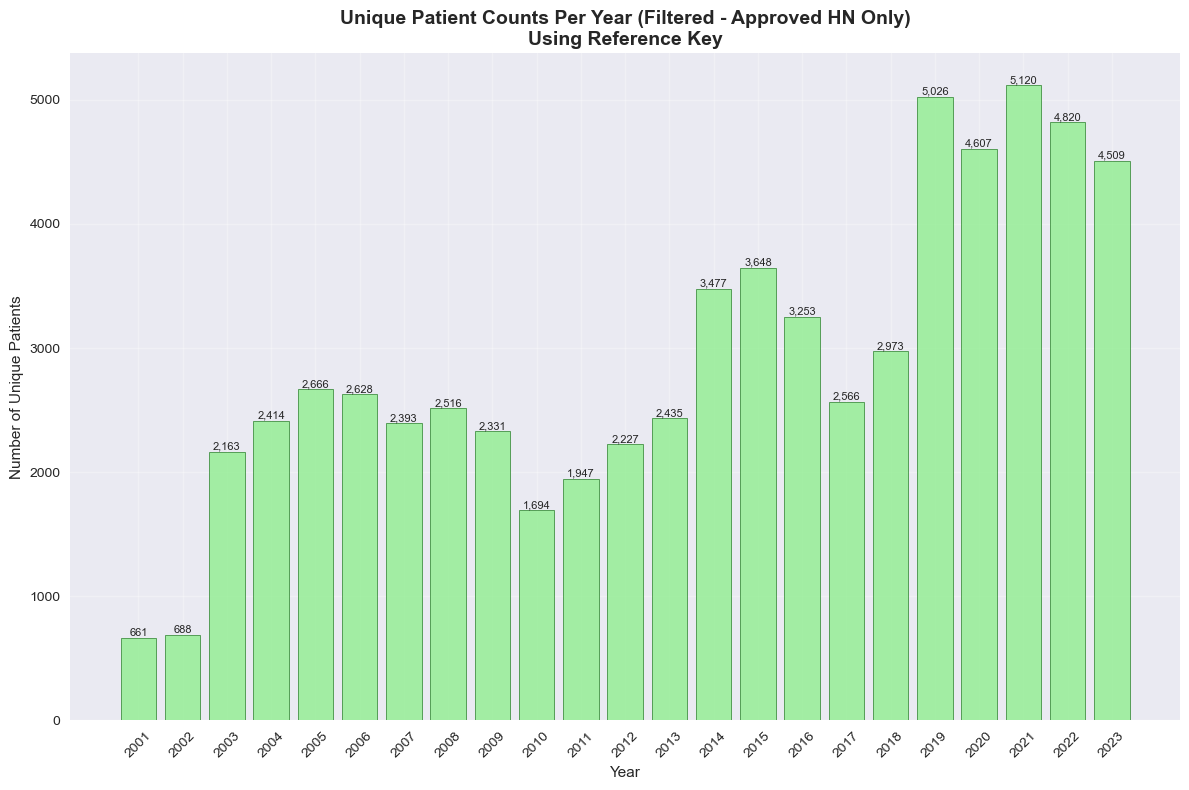


✓ Filtered statistics saved to: ./Sepsis_plt/plt_year/filtered_approved_hn/patient_counts_statistics_FILTERED.csv

FILTERED DATA SUMMARY STATISTICS
Total unique patients (2001-2023): 66,762
Total records (2001-2023): 1,348,576
Overall average records per patient: 20.20

Year with most patients: 2021 (5,120.0 patients)
Year with highest records/patient: 2017 (22.74 records/patient)

Comparing filtered vs original data...
✓ Comparison saved to: ./Sepsis_plt/plt_year/filtered_approved_hn/filtered_vs_original_comparison.csv

OVERALL COMPARISON:
Patients - Original: 1,177,901, Filtered: 66,762
Patients - Removed: 1,111,139 (94.3%)
Records - Original: 9,211,394, Filtered: 1,348,576
Records - Removed: 7,862,818 (85.4%)


In [6]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def count_unique_patients_filtered():
    """Count unique patients per year using filtered data"""
    input_folder = "./Sepsis_plt/plt_year/filtered_approved_hn/"
    
    # Find all filtered plt_YYYY.csv files
    pattern = os.path.join(input_folder, "plt_*.csv")
    year_files = glob.glob(pattern)
    
    # Filter out the master combined file if it exists
    year_files = [f for f in year_files if 'ALL_YEARS' not in f]
    
    if not year_files:
        print("No filtered year files found!")
        return
    
    print(f"Found {len(year_files)} filtered year files")
    
    year_stats = []
    
    for file_path in year_files:
        try:
            # Extract year from filename
            filename = os.path.basename(file_path)
            year = filename.replace('plt_', '').replace('.csv', '')
            
            # Read the filtered CSV file
            df = pd.read_csv(file_path)
            
            # Count unique patients using Reference Key only
            if 'Reference Key' in df.columns:
                unique_ref_keys = df['Reference Key'].nunique()
                total_rows = len(df)
                
                year_stats.append({
                    'Year': int(year),
                    'Unique_Patients': unique_ref_keys,
                    'Total_Records': total_rows,
                    'Records_per_Patient': total_rows / unique_ref_keys if unique_ref_keys > 0 else 0
                })
                
                print(f"  {year}: {unique_ref_keys} unique patients ({total_rows} total records)")
            else:
                print(f"  ✗ 'Reference Key' column not found in {filename}")
            
        except Exception as e:
            print(f"  ✗ Error processing {file_path}: {e}")
            continue
    
    return pd.DataFrame(year_stats).sort_values('Year')

def create_filtered_patient_plot(df_stats):
    """Create plots showing unique patient counts from filtered data"""
    if df_stats is None or df_stats.empty:
        print("No filtered data to plot!")
        return
    
    # Create the plot with reasonable size
    fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
    
    years = df_stats['Year']
    unique_patients = df_stats['Unique_Patients']
    total_records = df_stats['Total_Records']
    
    # Plot 1: Unique patients per year (filtered)
    bars = ax1.bar(range(len(years)), unique_patients, alpha=0.8, color='lightgreen', edgecolor='darkgreen', linewidth=0.5)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Unique Patients')
    ax1.set_title('Unique Patient Counts Per Year (Filtered - Approved HN Only)\nUsing Reference Key', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(years)))
    ax1.set_xticklabels(years, rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # # Plot 2: Records per patient (filtered)
    # records_per_patient = df_stats['Records_per_Patient']
    # bars2 = ax2.bar(range(len(years)), records_per_patient, alpha=0.8, color='orange', edgecolor='darkorange', linewidth=0.5)
    # ax2.set_xlabel('Year')
    # ax2.set_ylabel('Average Records per Patient')
    # ax2.set_title('Average Number of Records per Unique Patient (Filtered)', fontsize=14, fontweight='bold')
    # ax2.set_xticks(range(len(years)))
    # ax2.set_xticklabels(years, rotation=45)
    # ax2.grid(True, alpha=0.3)
    
    # # Add value labels on bars
    # for bar in bars2:
    #     height = bar.get_height()
    #     if height > 0:
    #         ax2.text(bar.get_x() + bar.get_width()/2., height,
    #                 f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    
    # Save the plot with filtered name
    output_folder = "./Sepsis_plt/plt_year/filtered_approved_hn/"
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year_FILTERED.png'), dpi=150, bbox_inches='tight')
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year_FILTERED.pdf'), bbox_inches='tight')
    plt.show()
    
    return fig

def create_simple_filtered_plot(df_stats):
    """Create a simple single plot for filtered data"""
    if df_stats is None or df_stats.empty:
        print("No filtered data to plot!")
        return
    
    # Create a simple single plot
    plt.figure(figsize=(10, 6))
    
    years = df_stats['Year']
    unique_patients = df_stats['Unique_Patients']
    
    bars = plt.bar(range(len(years)), unique_patients, alpha=0.8, color='lightgreen', edgecolor='darkgreen', linewidth=0.5)
    plt.xlabel('Year')
    plt.ylabel('Number of Unique Patients')
    plt.title('Unique Patient Counts Per Year (Filtered - Approved HN Only)', fontsize=14, fontweight='bold')
    plt.xticks(range(len(years)), years, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    
    # Save the plot with filtered name
    output_folder = "./Sepsis_plt/plt_year/filtered_approved_hn/"
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year_FILTERED_simple.png'), dpi=150, bbox_inches='tight')
    plt.savefig(os.path.join(output_folder, 'unique_patients_per_year_FILTERED_simple.pdf'), bbox_inches='tight')
    plt.show()

def save_filtered_statistics(df_stats):
    """Save the filtered statistics to CSV"""
    if df_stats is not None and not df_stats.empty:
        output_file = "./Sepsis_plt/plt_year/filtered_approved_hn/patient_counts_statistics_FILTERED.csv"
        df_stats.to_csv(output_file, index=False)
        print(f"\n✓ Filtered statistics saved to: {output_file}")
        
        # Print summary
        print("\n" + "="*60)
        print("FILTERED DATA SUMMARY STATISTICS")
        print("="*60)
        print(f"Total unique patients (2001-2023): {df_stats['Unique_Patients'].sum():,}")
        print(f"Total records (2001-2023): {df_stats['Total_Records'].sum():,}")
        print(f"Overall average records per patient: {df_stats['Total_Records'].sum() / df_stats['Unique_Patients'].sum():.2f}")
        
        # Year with most patients
        max_year = df_stats.loc[df_stats['Unique_Patients'].idxmax()]
        print(f"\nYear with most patients: {int(max_year['Year'])} ({max_year['Unique_Patients']:,} patients)")
        
        # Year with highest records per patient
        max_records_year = df_stats.loc[df_stats['Records_per_Patient'].idxmax()]
        print(f"Year with highest records/patient: {int(max_records_year['Year'])} ({max_records_year['Records_per_Patient']:.2f} records/patient)")

def compare_with_original():
    """Compare filtered data with original data"""
    print("\nComparing filtered vs original data...")
    
    # Read original statistics if available
    original_stats_file = "./Sepsis_plt/plt_year/patient_counts_statistics.csv"
    filtered_stats_file = "./Sepsis_plt/plt_year/filtered_approved_hn/patient_counts_statistics_FILTERED.csv"
    
    if os.path.exists(original_stats_file) and os.path.exists(filtered_stats_file):
        try:
            original_df = pd.read_csv(original_stats_file)
            filtered_df = pd.read_csv(filtered_stats_file)
            
            # Merge on Year for comparison
            comparison_df = original_df.merge(filtered_df, on='Year', suffixes=('_Original', '_Filtered'))
            
            # Calculate differences
            comparison_df['Patients_Removed'] = comparison_df['Unique_Patients_Original'] - comparison_df['Unique_Patients_Filtered']
            comparison_df['Patients_Removed_Percent'] = (comparison_df['Patients_Removed'] / comparison_df['Unique_Patients_Original']) * 100
            
            comparison_df['Records_Removed'] = comparison_df['Total_Records_Original'] - comparison_df['Total_Records_Filtered']
            comparison_df['Records_Removed_Percent'] = (comparison_df['Records_Removed'] / comparison_df['Total_Records_Original']) * 100
            
            # Save comparison
            comparison_file = "./Sepsis_plt/plt_year/filtered_approved_hn/filtered_vs_original_comparison.csv"
            comparison_df.to_csv(comparison_file, index=False)
            print(f"✓ Comparison saved to: {comparison_file}")
            
            # Print overall comparison
            total_original_patients = comparison_df['Unique_Patients_Original'].sum()
            total_filtered_patients = comparison_df['Unique_Patients_Filtered'].sum()
            total_original_records = comparison_df['Total_Records_Original'].sum()
            total_filtered_records = comparison_df['Total_Records_Filtered'].sum()
            
            print(f"\nOVERALL COMPARISON:")
            print(f"Patients - Original: {total_original_patients:,}, Filtered: {total_filtered_patients:,}")
            print(f"Patients - Removed: {total_original_patients - total_filtered_patients:,} ({(total_original_patients - total_filtered_patients)/total_original_patients*100:.1f}%)")
            print(f"Records - Original: {total_original_records:,}, Filtered: {total_filtered_records:,}")
            print(f"Records - Removed: {total_original_records - total_filtered_records:,} ({(total_original_records - total_filtered_records)/total_original_records*100:.1f}%)")
            
        except Exception as e:
            print(f"  Error in comparison: {e}")

def main():
    """Main function to analyze and plot filtered patient counts"""
    print("Analyzing unique patient counts from FILTERED data...")
    
    # Count unique patients per year from filtered data
    df_stats = count_unique_patients_filtered()
    
    if df_stats is not None and not df_stats.empty:
        # Try to create the double plot first
        try:
            create_filtered_patient_plot(df_stats)
        except Exception as e:
            print(f"Double plot failed: {e}")
            print("Creating simple filtered plot instead...")
            create_simple_filtered_plot(df_stats)
        
        # Save statistics
        save_filtered_statistics(df_stats)
        
        # Compare with original data
        compare_with_original()
    else:
        print("No filtered data found to analyze!")

if __name__ == "__main__":
    main()